# Import required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pickle

# Step 1: Load and Inspect the Dataset

In [2]:
df = pd.read_csv('/kaggle/input/churn-dataset/churn-bigml-80.csv')

In [3]:
print("Dataset Head:\n", df.head())
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)
print("\nDataset Shape:\n", df.shape)

Dataset Head:
   State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1      

# Step 2: Data Preprocessing

In [4]:
# Selecting key features related to customer behavior
features = ['Account length', 'Number vmail messages', 'Total day minutes', 
            'Total eve minutes', 'Total night minutes', 'Total intl minutes', 
            'Customer service calls', 'International plan', 'Voice mail plan']
X = df[features].copy()

In [5]:
# Encode categorical variables
label_encoders = {}
for column in ['International plan', 'Voice mail plan']:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

In [6]:
# Standardize numerical features for better clustering performance
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 3: Determine Optimal k – Elbow Method

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

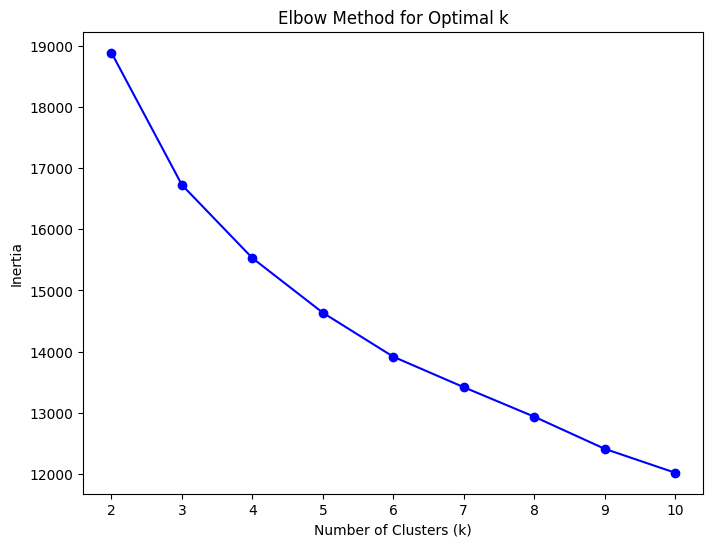

In [7]:
inertia = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.savefig('/kaggle/working/elbow_plot.png')
plt.show()

The "elbow" in the graph occurs around k=3 or k=4

# Step 4: Determine Optimal k – Silhouette Score

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

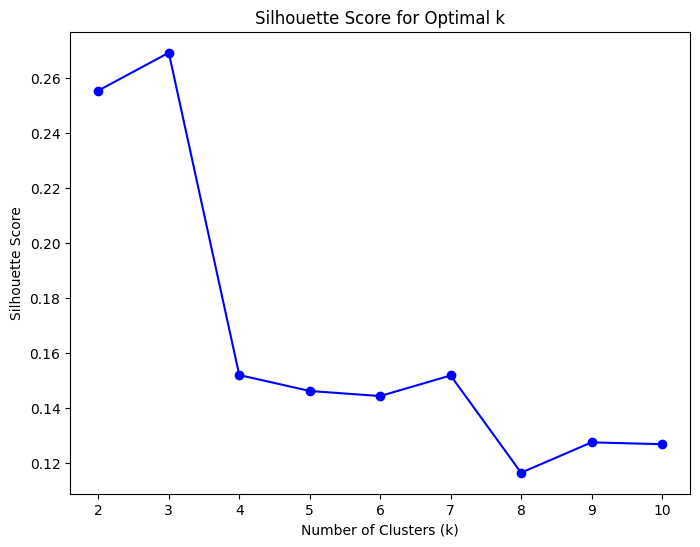

In [8]:
silhouette_scores = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 6))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.savefig('/kaggle/working/silhouette_plot.png')
plt.show()

The silhouette score is highest when k=3 (~0.267), suggesting that 3 clusters provide the best separation and cohesion for our data.

# Step 5: Apply K-Means with Optimal k = 3

In [9]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

# Step 6: Visualize Clusters

/tmp/ipykernel_97/2440697345.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter([], [], c=f'C{i}', label=label, cmap='viridis')
/tmp/ipykernel_97/2440697345.py:13: UserWarning: Glyph 128995 (\N{LARGE PURPLE CIRCLE}) missing from current font.
  plt.savefig('/kaggle/working/cluster_plot.png')
/tmp/ipykernel_97/2440697345.py:13: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from current font.
  plt.savefig('/kaggle/working/cluster_plot.png')
/tmp/ipykernel_97/2440697345.py:13: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from current font.
  plt.savefig('/kaggle/working/cluster_plot.png')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128995 (\N{LARGE PURPLE CIRCLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) mi

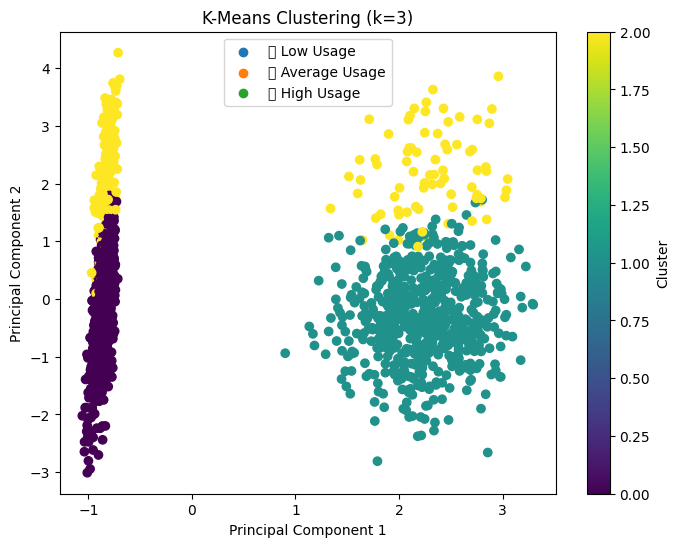

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.colorbar(label='Cluster')
# Add your cluster labels for clarity
for i, label in enumerate(['🟣 Low Usage', '🟢 Average Usage', '🟡 High Usage']):
    plt.scatter([], [], c=f'C{i}', label=label, cmap='viridis')
plt.legend()
plt.savefig('/kaggle/working/cluster_plot.png')
plt.show()

The PCA projection shows three distinct clusters:
 - Cluster 0 (purple): Possibly low-usage customers with basic plans.
 - Cluster 1 (teal): The largest group, average usage and balanced service patterns.
 - Cluster 2 (yellow): Likely high-usage or distinct behavior customers (e.g., frequent international calls).

# Step 7: Evaluate Clustering Quality

In [11]:
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"\nSilhouette Score for k={optimal_k}: {silhouette_avg}")


Silhouette Score for k=3: 0.2692150428055504


# Step 8: Save Model and Results

In [12]:
with open('/kaggle/working/kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)
pd.DataFrame({'Cluster': kmeans.labels_}).to_csv('/kaggle/working/cluster_assignments.csv', index=False)

print("\nSaved: kmeans_model.pkl, cluster_assignments.csv, elbow_plot.png, silhouette_plot.png, cluster_plot.png")


Saved: kmeans_model.pkl, cluster_assignments.csv, elbow_plot.png, silhouette_plot.png, cluster_plot.png
